## Title

> Sources: 
- http://download.inep.gov.br/microdados/microdados_educacao_superior_2018.zip
- http://download.inep.gov.br/informacoes_estatisticas/sinopses_estatisticas/sinopses_educacao_superior/sinopse_educacao_superior_2018.zip

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## <span style="color:red">DO NOT LOAD THIS DATAFRAME - MOVE TO 'CLEANING DATA' SESSION

In [2]:
alunos_df = pd.read_csv('DM_ALUNO.csv', sep='|')

C:\Users\ROLD003\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
alunos_df.head(10)

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2017
1,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2016
2,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2012
3,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2015
4,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2013
5,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2012
6,2018,1,1,1,1,NaN,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2015
7,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2017
8,2018,1,1,1,1,NaN,3.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2015
9,2018,1,1,1,1,NaN,1.0,1.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2013


In [4]:
alunos_df.iloc[:10, 5:15]

,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,CO_CINE_ROTULO,ID_ALUNO,CO_ALUNO_CURSO,CO_ALUNO_CURSO_ORIGEM,TP_COR_RACA
0,NaN,3.0,1.0,1,1,0421D01,2ECD7C9BEA7DCEBC31B9F2874D454F71,76445203,NaN,2
1,NaN,3.0,1.0,1,1,0421D01,2A9470AC3FC03AD130954809A84BC7D4,76448482,NaN,3
2,NaN,3.0,1.0,1,1,0421D01,3EA3DF175677D93C4FDD47865E89B92A,76484508,NaN,3
3,NaN,3.0,1.0,1,1,0421D01,E535A93D94430667B67D180C506CCB66,76485260,NaN,2
4,NaN,3.0,1.0,1,1,0421D01,EF1C01E9B84BEB8D6AA9702F59A90410,76449602,NaN,3
5,NaN,3.0,1.0,1,1,0421D01,E92DBC6D54AD8AC7419AC6818C9D4C3B,76471898,NaN,2
6,NaN,1.0,1.0,1,1,0421D01,442253EDCC14C59DA844B46DE6BFC49C,76471899,NaN,3
7,NaN,3.0,1.0,1,1,0421D01,0617FBEA7F8A7FE095AC7A425DB9C365,76484877,NaN,1
8,NaN,3.0,1.0,1,1,0421D01,023771AFF243E3A6682FE1F2E7186C54,76472660,NaN,3
9,NaN,1.0,1.0,1,1,0421D01,1F6DAC46F9DCE74E16573BAD76F51453,76460158,NaN,2


In [5]:
alunos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043993 entries, 0 to 12043992
Columns: 105 entries, NU_ANO_CENSO to NU_ANO_INGRESSO
dtypes: float64(62), int64(40), object(3)
memory usage: 9.4+ GB


#### Filtrando Medicina

In [6]:
auxiliar_df = pd.read_csv('TB_AUX_CINE_BRASIL.csv', sep='|', encoding='latin-1')
auxiliar_df.head(5)

,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,CO_CINE_ROTULO,NO_CINE_ROTULO
0,0,Programas básicos,1,Programas básicos,11,Programas básicos,0011A01,ABI Educação
1,0,Programas básicos,1,Programas básicos,11,Programas básicos,0011A02,ABI Artes e humanidades
2,0,Programas básicos,1,Programas básicos,11,Programas básicos,0011A03,"ABI Ciências sociais, jornalismo e informação"
3,0,Programas básicos,1,Programas básicos,11,Programas básicos,0011A04,"ABI Negócios, administração e direito"
4,0,Programas básicos,1,Programas básicos,11,Programas básicos,0011A05,"ABI Ciências naturais, matemática e estatística"


In [7]:
auxiliar_df[auxiliar_df['NO_CINE_ROTULO'] == 'Medicina']

,CO_CINE_AREA_GERAL,NO_CINE_AREA_GERAL,CO_CINE_AREA_ESPECIFICA,NO_CINE_AREA_ESPECIFICA,CO_CINE_AREA_DETALHADA,NO_CINE_AREA_DETALHADA,CO_CINE_ROTULO,NO_CINE_ROTULO
319,9,Saúde e bem-estar,91,Saúde,912,Medicina,0912M01,Medicina


In [8]:
list(alunos_df.IN_MATRICULA.value_counts().index)

[1, 0]

In [9]:
OCDE_med_cod = list(auxiliar_df[auxiliar_df['NO_CINE_ROTULO'] == 'Medicina']['CO_CINE_ROTULO'])
OCDE_med_cod

['0912M01']

In [11]:
medicina_df = alunos_df[alunos_df['CO_CINE_ROTULO'].isin(OCDE_med_cod)]
medicina_df

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
3703,2018,1,1,1,12,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2012
3704,2018,1,1,1,12,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2015
3705,2018,1,1,1,12,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2016
3706,2018,1,1,1,12,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2013
3707,2018,1,1,1,12,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12040603,2018,22514,4,3,1408505,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
12040604,2018,22514,4,3,1408505,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
12040605,2018,22514,4,3,1408505,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
12040606,2018,22514,4,3,1408505,NaN,4.0,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018


In [12]:
medicina_df.to_csv('medicina_df_2018.csv')

> Comments: salvando um novo arquivo com a base de medicina para otimizar o processamento de dados.

## <span style="color:blue">Cleaning Data

In [243]:
loading_medicina = pd.read_csv('medicina_df_2018.csv')

In [497]:
medicina_df = loading_medicina.copy()
medicina_df

,Unnamed: 0,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,3703,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2012
1,3704,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2015
2,3705,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2016
3,3706,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2013
4,3707,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177366,12040603,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177367,12040604,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177368,12040605,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177369,12040606,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018


In [498]:
medicina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177371 entries, 0 to 177370
Columns: 106 entries, Unnamed: 0 to NU_ANO_INGRESSO
dtypes: float64(62), int64(41), object(3)
memory usage: 143.4+ MB


In [499]:
medicina_df = medicina_df[medicina_df['IN_MATRICULA'] == 1]
medicina_df

,Unnamed: 0,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,3703,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2012
1,3704,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2015
2,3705,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2016
3,3706,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2013
4,3707,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177366,12040603,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177367,12040604,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177368,12040605,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177369,12040606,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018


> Comments: validado com a sinopse estatística do ensino superior 2018. Tanto o Censo quanto na Sinopse Estatística trazem 167,788 alunos de Medicina com matrículas ativas.

In [500]:
medicina_df = medicina_df.rename(columns={'Unnamed: 0': 'original_index'})
medicina_df

,original_index,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,3703,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2012
1,3704,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2015
2,3705,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2016
3,3706,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,1,0,0,NaN,2013
4,3707,2018,1,1,1,12,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177366,12040603,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177367,12040604,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177368,12040605,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018
177369,12040606,2018,22514,4,3,1408505,NaN,4.0,1.0,1,...,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2018


## Including category names

#### #1 - TP_CATEGORIA_ADMINISTRATIVA

In [501]:
type(medicina_df.TP_CATEGORIA_ADMINISTRATIVA[0])

numpy.int64

In [502]:
list(medicina_df.TP_CATEGORIA_ADMINISTRATIVA.value_counts().index.sort_values())

[1, 2, 3, 4, 5, 7]

In [503]:
list_cat_adm = {1: 'Pública Federal',
                2: 'Pública Estadual',
                3: 'Pública Municipal',
                4: 'Privada com fins lucrativos',
                5: 'Privada sem fins lucrativos',
                6: 'Privada - Particular em sentido estrito',
                7: 'Especial',
                8: 'Privada comunitária',
                9: 'Privada confessional'}

medicina_df['TP_CAT_ADM_NAME'] = medicina_df.apply(lambda x: list_cat_adm[x.TP_CATEGORIA_ADMINISTRATIVA], axis=1)

In [504]:
medicina_df.iloc[:, np.r_[3, 106]].sample(10)

,TP_CATEGORIA_ADMINISTRATIVA,TP_CAT_ADM_NAME
170086,4,Privada com fins lucrativos
49288,4,Privada com fins lucrativos
10182,5,Privada sem fins lucrativos
141903,4,Privada com fins lucrativos
113132,4,Privada com fins lucrativos
48179,5,Privada sem fins lucrativos
56990,2,Pública Estadual
51152,5,Privada sem fins lucrativos
117667,5,Privada sem fins lucrativos
69935,5,Privada sem fins lucrativos


#### #2 - TP_ORGANIZACAO_ACADEMICA

In [505]:
list_org_acad = {1: 'Universidade',
                 2: 'Centro Universitário',
                 3: 'Faculdade',
                 4: 'Instituto Federal de Educação, Ciência e Tecnologia',
                 5: 'Centro Federal de Educação Tecnológica'}

medicina_df['TP_ORG_ACAD_NAME'] = medicina_df.apply(lambda x: list_org_acad[x.TP_ORGANIZACAO_ACADEMICA], axis=1)

In [506]:
medicina_df.iloc[:, np.r_[4, 107]].sample(10)

,TP_ORGANIZACAO_ACADEMICA,TP_ORG_ACAD_NAME
89653,1,Universidade
91770,1,Universidade
59089,1,Universidade
39634,1,Universidade
176632,3,Faculdade
44385,1,Universidade
129580,2,Centro Universitário
150342,2,Centro Universitário
52952,1,Universidade
48854,3,Faculdade


#### #3 - TP_COR_RACA

In [507]:
list_raca = {0: 'Aluno não quis declarar cor/raça',
             1: 'Branca',
             2: 'Preta',
             3: 'Parda',
             4: 'Amarela',
             5: 'Indígena',
             9: 'Não dispõe da informação (Não resposta)'}

medicina_df['TP_RACA_NAME'] = medicina_df.apply(lambda x: list_raca[x.TP_COR_RACA], axis=1)

In [508]:
medicina_df.iloc[:, np.r_[15, 108]].sample(10)

,TP_COR_RACA,TP_RACA_NAME
51052,1,Branca
119219,3,Parda
169264,1,Branca
128221,1,Branca
104035,1,Branca
105970,0,Aluno não quis declarar cor/raça
169696,1,Branca
94731,0,Aluno não quis declarar cor/raça
118646,3,Parda
105565,3,Parda


#### #4 - TP_SEXO

In [509]:
list_sexo = {1: 'Feminino',
             2: 'Masculino'}

medicina_df['TP_SEXO_NAME'] = medicina_df.apply(lambda x: list_sexo[x.TP_SEXO], axis=1)

In [510]:
medicina_df.iloc[:, np.r_[16, 109]].sample(10)

,TP_SEXO,TP_SEXO_NAME
82269,2,Masculino
19781,2,Masculino
37051,2,Masculino
106038,1,Feminino
130057,2,Masculino
162671,2,Masculino
10483,1,Feminino
157516,2,Masculino
78786,2,Masculino
164412,2,Masculino


#### #5 - TP_NACIONALIDADE

In [511]:
list_nac = {1: 'Brasileira',
            2: 'Brasileira - nascido no exterior ou naturalizado',
            3: 'Estrangeira'}

medicina_df['TP_NAC_NAME'] = medicina_df.apply(lambda x: list_nac[x.TP_NACIONALIDADE], axis=1)

In [512]:
medicina_df.iloc[:, np.r_[21, 110]].sample(10)

,TP_NACIONALIDADE,TP_NAC_NAME
4135,1,Brasileira
155666,1,Brasileira
27792,1,Brasileira
162741,1,Brasileira
79681,1,Brasileira
84690,1,Brasileira
120152,1,Brasileira
134182,1,Brasileira
94526,1,Brasileira
156791,1,Brasileira


#### #6 - IN_DEFICIENCIA

In [513]:
list_def = {0: 'Não',
            1: 'Sim',
            9: 'Não dispõe de informação (Não resposta)'}

medicina_df['IN_DEF_NAME'] = medicina_df.apply(lambda x: list_def[x.IN_DEFICIENCIA], axis=1)

In [514]:
medicina_df.iloc[:, np.r_[25, 111]].sample(10)

,IN_DEFICIENCIA,IN_DEF_NAME
97472,0,Não
160334,0,Não
21070,1,Sim
232,9,Não dispõe de informação (Não resposta)
67174,0,Não
78202,0,Não
79038,0,Não
100964,0,Não
72119,0,Não
155335,9,Não dispõe de informação (Não resposta)


#### #7 - TP_SITUACAO

In [515]:
list_sit = {2: 'Cursando',
            3: 'Matrícula trancada',
            4: 'Desvinculado do curso',
            5: 'Transferido para outro curso da mesma IES',
            6: 'Formado',
            7: 'Falecido'}

medicina_df['TP_SIT_NAME'] = medicina_df.apply(lambda x: list_sit[x.TP_SITUACAO], axis=1)

In [516]:
medicina_df.iloc[:, np.r_[39, 112]].sample(10)

,TP_SITUACAO,TP_SIT_NAME
57750,2,Cursando
5897,6,Formado
75178,6,Formado
171688,2,Cursando
93218,2,Cursando
138594,6,Formado
136348,6,Formado
57282,2,Cursando
102050,2,Cursando
2243,2,Cursando


#### #8 - TP_ESCOLA_CONCLUSAO_ENS_MEDIO

In [517]:
list_escola = {1: 'Pública',
               2: 'Privada',
               9: 'Não dispõe da informação (Não resposta)'}

medicina_df['TP_ESC_ENS_MED_NAME'] = medicina_df.apply(lambda x: list_escola[x.TP_ESCOLA_CONCLUSAO_ENS_MEDIO], axis=1)

In [518]:
medicina_df.iloc[:, np.r_[91, 113]].sample(10)

,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,TP_ESC_ENS_MED_NAME
83035,2,Privada
59819,1,Pública
100418,1,Pública
66686,2,Privada
10542,1,Pública
88805,1,Pública
167319,2,Privada
162872,1,Pública
27311,2,Privada
142087,2,Privada


## Dropping and reordering columns

In [519]:
medicina_df = medicina_df.drop(['TP_TURNO', 
                                'TP_GRAU_ACADEMICO', 
                                'TP_MODALIDADE_ENSINO', 
                                'TP_NIVEL_ACADEMICO', 
                                'IN_DEFICIENCIA_AUDITIVA',
                                'IN_DEFICIENCIA_FISICA', 
                                'IN_DEFICIENCIA_INTELECTUAL', 
                                'IN_DEFICIENCIA_MULTIPLA', 
                                'IN_DEFICIENCIA_SURDEZ', 
                                'IN_DEFICIENCIA_SURDOCEGUEIRA', 
                                'IN_DEFICIENCIA_BAIXA_VISAO', 
                                'IN_DEFICIENCIA_CEGUEIRA', 
                                'IN_DEFICIENCIA_SUPERDOTACAO', 
                                'IN_TGD_AUTISMO', 
                                'IN_TGD_SINDROME_ASPERGER', 
                                'IN_TGD_SINDROME_RETT', 
                                'IN_TGD_TRANSTOR_DESINTEGRATIVO', 
                                'IN_APOIO_SOCIAL', 
                                'IN_APOIO_ALIMENTACAO', 
                                'IN_APOIO_BOLSA_PERMANENCIA', 
                                'IN_APOIO_BOLSA_TRABALHO', 
                                'IN_APOIO_MATERIAL_DIDATICO', 
                                'IN_APOIO_MORADIA', 
                                'IN_APOIO_TRANSPORTE', 
                                'IN_ALUNO_PARFOR', 
                                'IN_INGRESSO_VAGA_NOVA', 
                                'IN_INGRESSO_PROCESSO_SELETIVO'], axis=1)

In [520]:
medicina_df

,original_index,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,CO_CINE_ROTULO,ID_ALUNO,CO_ALUNO_CURSO,...,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO,TP_CAT_ADM_NAME,TP_ORG_ACAD_NAME,TP_RACA_NAME,TP_SEXO_NAME,TP_NAC_NAME,IN_DEF_NAME,TP_SIT_NAME,TP_ESC_ENS_MED_NAME
0,3703,2018,1,1,1,12,NaN,0912M01,F149B77F28152B5EE3793A26BCC95377,76472476,...,0,2012,Pública Federal,Universidade,Parda,Masculino,Brasileira,Não dispõe de informação (Não resposta),Cursando,Privada
1,3704,2018,1,1,1,12,NaN,0912M01,8FEF993C26DC9BFC3904471AD06E51D1,76485262,...,0,2015,Pública Federal,Universidade,Parda,Masculino,Brasileira,Não dispõe de informação (Não resposta),Cursando,Pública
2,3705,2018,1,1,1,12,NaN,0912M01,CE905568CB06FCBDBFB41A016CCC84DA,76465350,...,0,2016,Pública Federal,Universidade,Branca,Feminino,Brasileira,Não dispõe de informação (Não resposta),Cursando,Privada
3,3706,2018,1,1,1,12,NaN,0912M01,F4C4334B56F3396F5EEF32143C8C3EF4,76486246,...,0,2013,Pública Federal,Universidade,Branca,Masculino,Brasileira,Não dispõe de informação (Não resposta),Formado,Pública
4,3707,2018,1,1,1,12,NaN,0912M01,1DD1E543D85346442E856DD27557F074,76471061,...,0,2014,Pública Federal,Universidade,Branca,Masculino,Brasileira,Não dispõe de informação (Não resposta),Cursando,Pública
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177366,12040603,2018,22514,4,3,1408505,NaN,0912M01,EA2D044856EF89AB22B3E3D1C10C9DFE,47441127,...,1,2018,Privada com fins lucrativos,Faculdade,Branca,Feminino,Brasileira,Não,Cursando,Privada
177367,12040604,2018,22514,4,3,1408505,NaN,0912M01,4DE3472660E3EB48D0F4C4261DD72826,47441128,...,1,2018,Privada com fins lucrativos,Faculdade,Aluno não quis declarar cor/raça,Feminino,Brasileira,Não,Cursando,Pública
177368,12040605,2018,22514,4,3,1408505,NaN,0912M01,25FE5B36DFDE8AF3749086BAC2F2DB84,47441134,...,1,2018,Privada com fins lucrativos,Faculdade,Aluno não quis declarar cor/raça,Feminino,Brasileira,Não,Cursando,Privada
177369,12040606,2018,22514,4,3,1408505,NaN,0912M01,D08DDA61CCC73A0712B92B5D98E8C77D,47441138,...,1,2018,Privada com fins lucrativos,Faculdade,Parda,Masculino,Brasileira,Não,Cursando,Privada


In [521]:
medicina_df.columns.to_list()

['original_index',
 'NU_ANO_CENSO',
 'CO_IES',
 'TP_CATEGORIA_ADMINISTRATIVA',
 'TP_ORGANIZACAO_ACADEMICA',
 'CO_CURSO',
 'CO_CURSO_POLO',
 'CO_CINE_ROTULO',
 'ID_ALUNO',
 'CO_ALUNO_CURSO',
 'CO_ALUNO_CURSO_ORIGEM',
 'TP_COR_RACA',
 'TP_SEXO',
 'NU_ANO_NASCIMENTO',
 'NU_MES_NASCIMENTO',
 'NU_DIA_NASCIMENTO',
 'NU_IDADE',
 'TP_NACIONALIDADE',
 'CO_PAIS_ORIGEM',
 'CO_UF_NASCIMENTO',
 'CO_MUNICIPIO_NASCIMENTO',
 'IN_DEFICIENCIA',
 'TP_SITUACAO',
 'QT_CARGA_HORARIA_TOTAL',
 'QT_CARGA_HORARIA_INTEG',
 'DT_INGRESSO_CURSO',
 'IN_INGRESSO_VESTIBULAR',
 'IN_INGRESSO_ENEM',
 'IN_INGRESSO_AVALIACAO_SERIADA',
 'IN_INGRESSO_SELECAO_SIMPLIFICA',
 'IN_INGRESSO_OUTRO_TIPO_SELECAO',
 'IN_INGRESSO_VAGA_REMANESC',
 'IN_INGRESSO_VAGA_PROG_ESPECIAL',
 'IN_INGRESSO_TRANSF_EXOFFICIO',
 'IN_INGRESSO_DECISAO_JUDICIAL',
 'IN_INGRESSO_CONVENIO_PECG',
 'IN_INGRESSO_EGRESSO',
 'IN_INGRESSO_OUTRA_FORMA',
 'IN_RESERVA_VAGAS',
 'IN_RESERVA_ETNICO',
 'IN_RESERVA_DEFICIENCIA',
 'IN_RESERVA_ENSINO_PUBLICO',
 'IN_RESERVA

In [522]:
new_columns_order = ['original_index',
                     'NU_ANO_CENSO',
                     'CO_IES',
                     'TP_CATEGORIA_ADMINISTRATIVA',
                     'TP_CAT_ADM_NAME',
                     'TP_ORGANIZACAO_ACADEMICA',
                     'TP_ORG_ACAD_NAME',
                     'CO_CURSO',
                     'CO_CURSO_POLO',
                     'CO_CINE_ROTULO',
                     'ID_ALUNO',
                     'CO_ALUNO_CURSO',
                     'CO_ALUNO_CURSO_ORIGEM',
                     'TP_COR_RACA',
                     'TP_RACA_NAME',
                     'TP_SEXO',
                     'TP_SEXO_NAME',
                     'NU_ANO_NASCIMENTO',
                     'NU_MES_NASCIMENTO',
                     'NU_DIA_NASCIMENTO',
                     'NU_IDADE',
                     'TP_NACIONALIDADE',
                     'TP_NAC_NAME',
                     'CO_PAIS_ORIGEM',
                     'CO_UF_NASCIMENTO',
                     'CO_MUNICIPIO_NASCIMENTO',
                     'IN_DEFICIENCIA',
                     'IN_DEF_NAME',
                     'TP_SITUACAO',
                     'TP_SIT_NAME',
                     'QT_CARGA_HORARIA_TOTAL',
                     'QT_CARGA_HORARIA_INTEG',
                     'DT_INGRESSO_CURSO',
                     'IN_INGRESSO_VESTIBULAR',
                     'IN_INGRESSO_ENEM',
                     'IN_INGRESSO_AVALIACAO_SERIADA',
                     'IN_INGRESSO_SELECAO_SIMPLIFICA',
                     'IN_INGRESSO_OUTRO_TIPO_SELECAO',
                     'IN_INGRESSO_VAGA_REMANESC',
                     'IN_INGRESSO_VAGA_PROG_ESPECIAL',
                     'IN_INGRESSO_TRANSF_EXOFFICIO',
                     'IN_INGRESSO_DECISAO_JUDICIAL',
                     'IN_INGRESSO_CONVENIO_PECG',
                     'IN_INGRESSO_EGRESSO',
                     'IN_INGRESSO_OUTRA_FORMA',
                     'IN_RESERVA_VAGAS',
                     'IN_RESERVA_ETNICO',
                     'IN_RESERVA_DEFICIENCIA',
                     'IN_RESERVA_ENSINO_PUBLICO',
                     'IN_RESERVA_RENDA_FAMILIAR',
                     'IN_RESERVA_OUTRA',
                     'IN_FINANCIAMENTO_ESTUDANTIL',
                     'IN_FIN_REEMB_FIES',
                     'IN_FIN_REEMB_ESTADUAL',
                     'IN_FIN_REEMB_MUNICIPAL',
                     'IN_FIN_REEMB_PROG_IES',
                     'IN_FIN_REEMB_ENT_EXTERNA',
                     'IN_FIN_REEMB_OUTRA',
                     'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                     'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
                     'IN_FIN_NAOREEMB_ESTADUAL',
                     'IN_FIN_NAOREEMB_MUNICIPAL',
                     'IN_FIN_NAOREEMB_PROG_IES',
                     'IN_FIN_NAOREEMB_ENT_EXTERNA',
                     'IN_FIN_NAOREEMB_OUTRA',
                     'IN_ATIVIDADE_EXTRACURRICULAR',
                     'IN_COMPLEMENTAR_ESTAGIO',
                     'IN_COMPLEMENTAR_EXTENSAO',
                     'IN_COMPLEMENTAR_MONITORIA',
                     'IN_COMPLEMENTAR_PESQUISA',
                     'IN_BOLSA_ESTAGIO',
                     'IN_BOLSA_EXTENSAO',
                     'IN_BOLSA_MONITORIA',
                     'IN_BOLSA_PESQUISA',
                     'TP_ESCOLA_CONCLUSAO_ENS_MEDIO',
                     'TP_ESC_ENS_MED_NAME',
                     'TP_SEMESTRE_CONCLUSAO',
                     'TP_SEMESTRE_REFERENCIA',
                     'IN_MOBILIDADE_ACADEMICA',
                     'TP_MOBILIDADE_ACADEMICA',
                     'TP_MOBILIDADE_ACADEMICA_INTERN',
                     'CO_IES_DESTINO',
                     'CO_PAIS_DESTINO',
                     'IN_MATRICULA',
                     'IN_CONCLUINTE',
                     'IN_INGRESSO_TOTAL',
                     'NU_ANO_INGRESSO']

medicina_df = medicina_df.reindex(columns=new_columns_order)

In [523]:
medicina_df

,original_index,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_CAT_ADM_NAME,TP_ORGANIZACAO_ACADEMICA,TP_ORG_ACAD_NAME,CO_CURSO,CO_CURSO_POLO,CO_CINE_ROTULO,...,TP_SEMESTRE_REFERENCIA,IN_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO
0,3703,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2012
1,3704,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2015
2,3705,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2016
3,3706,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,1,0,2013
4,3707,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177366,12040603,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018
177367,12040604,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018
177368,12040605,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018
177369,12040606,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018


## Analyzing columns to melt

#### #1 - Formas de ingresso

In [524]:
medicina_df.iloc[:, np.r_[33:51]].sample(10)

,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_INGRESSO_AVALIACAO_SERIADA,IN_INGRESSO_SELECAO_SIMPLIFICA,IN_INGRESSO_OUTRO_TIPO_SELECAO,IN_INGRESSO_VAGA_REMANESC,IN_INGRESSO_VAGA_PROG_ESPECIAL,IN_INGRESSO_TRANSF_EXOFFICIO,IN_INGRESSO_DECISAO_JUDICIAL,IN_INGRESSO_CONVENIO_PECG,IN_INGRESSO_EGRESSO,IN_INGRESSO_OUTRA_FORMA,IN_RESERVA_VAGAS,IN_RESERVA_ETNICO,IN_RESERVA_DEFICIENCIA,IN_RESERVA_ENSINO_PUBLICO,IN_RESERVA_RENDA_FAMILIAR,IN_RESERVA_OUTRA
156693,1,0,0,0,NaN,0,0,0,0,0,0,NaN,1,0.0,0.0,1.0,0.0,0.0
43640,1,0,0,0,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
170240,1,0,0,0,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
153886,1,0,0,0,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
98494,1,0,0,0,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
28198,1,0,0,0,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
161360,0,0,0,0,NaN,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
156147,0,0,0,0,NaN,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
47500,1,1,0,0,NaN,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
100242,1,0,0,0,NaN,0,0,0,0,0,0,NaN,1,0.0,0.0,1.0,1.0,0.0


In [525]:
list_ingresso = ['IN_INGRESSO_VESTIBULAR',
                 'IN_INGRESSO_ENEM',
                 'IN_INGRESSO_AVALIACAO_SERIADA',
                 'IN_INGRESSO_SELECAO_SIMPLIFICA',
                 'IN_INGRESSO_OUTRO_TIPO_SELECAO',
                 'IN_INGRESSO_VAGA_REMANESC',
                 'IN_INGRESSO_VAGA_PROG_ESPECIAL',
                 'IN_INGRESSO_TRANSF_EXOFFICIO',
                 'IN_INGRESSO_DECISAO_JUDICIAL',
                 'IN_INGRESSO_CONVENIO_PECG',
                 'IN_INGRESSO_EGRESSO',
                 'IN_INGRESSO_OUTRA_FORMA']

medicina_df['sum_ingresso'] = medicina_df[list_ingresso].sum(axis=1)

In [526]:
medicina_df['sum_ingresso'].describe()

count    167788.000000
mean          1.024275
std           0.156969
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: sum_ingresso, dtype: float64

In [527]:
medicina_df[medicina_df['sum_ingresso'] == 3].iloc[:, np.r_[33:45]]

,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_INGRESSO_AVALIACAO_SERIADA,IN_INGRESSO_SELECAO_SIMPLIFICA,IN_INGRESSO_OUTRO_TIPO_SELECAO,IN_INGRESSO_VAGA_REMANESC,IN_INGRESSO_VAGA_PROG_ESPECIAL,IN_INGRESSO_TRANSF_EXOFFICIO,IN_INGRESSO_DECISAO_JUDICIAL,IN_INGRESSO_CONVENIO_PECG,IN_INGRESSO_EGRESSO,IN_INGRESSO_OUTRA_FORMA
8507,1,1,0,1,NaN,0,0,0,0,0,0,NaN
175470,1,1,0,1,NaN,0,0,0,0,0,0,NaN
175501,1,1,0,1,NaN,0,0,0,0,0,0,NaN
175551,1,1,0,1,NaN,0,0,0,0,0,0,NaN
175561,1,1,0,1,NaN,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
176386,1,1,0,1,NaN,0,0,0,0,0,0,NaN
176387,1,1,0,1,NaN,0,0,0,0,0,0,NaN
176388,1,1,0,1,NaN,0,0,0,0,0,0,NaN
176390,1,1,0,1,NaN,0,0,0,0,0,0,NaN


In [528]:
medicina_df[medicina_df['IN_INGRESSO_ENEM'] == 1].iloc[:, np.r_[33:45]]

,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_INGRESSO_AVALIACAO_SERIADA,IN_INGRESSO_SELECAO_SIMPLIFICA,IN_INGRESSO_OUTRO_TIPO_SELECAO,IN_INGRESSO_VAGA_REMANESC,IN_INGRESSO_VAGA_PROG_ESPECIAL,IN_INGRESSO_TRANSF_EXOFFICIO,IN_INGRESSO_DECISAO_JUDICIAL,IN_INGRESSO_CONVENIO_PECG,IN_INGRESSO_EGRESSO,IN_INGRESSO_OUTRA_FORMA
0,0,1,0,0,NaN,0,0,0,0,0,0,NaN
1,0,1,0,0,NaN,0,0,0,0,0,0,NaN
2,0,1,0,0,NaN,0,0,0,0,0,0,NaN
3,0,1,0,0,NaN,0,0,0,0,0,0,NaN
4,0,1,0,0,NaN,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
177317,1,1,0,0,NaN,0,0,0,0,0,0,NaN
177323,1,1,0,0,NaN,0,0,0,0,0,0,NaN
177332,1,1,0,0,NaN,0,0,0,0,0,0,NaN
177340,1,1,0,0,NaN,0,0,0,0,0,0,NaN


#### #2 - Reserva de vagas

In [529]:
list_reserva = ['IN_RESERVA_VAGAS',
                'IN_RESERVA_ETNICO',
                'IN_RESERVA_DEFICIENCIA',
                'IN_RESERVA_ENSINO_PUBLICO',
                'IN_RESERVA_RENDA_FAMILIAR',
                'IN_RESERVA_OUTRA']

medicina_df['sum_reserva'] = medicina_df[list_reserva].sum(axis=1)

In [530]:
medicina_df['sum_reserva'].describe()

count    167788.000000
mean          0.263571
std           0.845584
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: sum_reserva, dtype: float64

In [531]:
medicina_df[medicina_df['sum_reserva'] == 6].iloc[:, np.r_[45:51]]

,IN_RESERVA_VAGAS,IN_RESERVA_ETNICO,IN_RESERVA_DEFICIENCIA,IN_RESERVA_ENSINO_PUBLICO,IN_RESERVA_RENDA_FAMILIAR,IN_RESERVA_OUTRA
9605,1,1.0,1.0,1.0,1.0,1.0
9831,1,1.0,1.0,1.0,1.0,1.0
9869,1,1.0,1.0,1.0,1.0,1.0


#### #3 - Financiamento reembolsavel

In [532]:
list_fin_reemb = ['IN_FIN_REEMB_FIES',
                  'IN_FIN_REEMB_ESTADUAL',
                  'IN_FIN_REEMB_MUNICIPAL',
                  'IN_FIN_REEMB_PROG_IES',
                  'IN_FIN_REEMB_ENT_EXTERNA',
                  'IN_FIN_REEMB_OUTRA']

medicina_df['sum_fin_reemb'] = medicina_df[list_fin_reemb].sum(axis=1)

In [533]:
medicina_df['sum_fin_reemb'].describe()

count    167788.000000
mean          0.182659
std           0.392661
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: sum_fin_reemb, dtype: float64

In [534]:
medicina_df[medicina_df['sum_fin_reemb'] == 3].iloc[:, np.r_[52:58]]

,IN_FIN_REEMB_FIES,IN_FIN_REEMB_ESTADUAL,IN_FIN_REEMB_MUNICIPAL,IN_FIN_REEMB_PROG_IES,IN_FIN_REEMB_ENT_EXTERNA,IN_FIN_REEMB_OUTRA
74376,1.0,0.0,0.0,1.0,1.0,NaN
74458,1.0,0.0,0.0,1.0,1.0,NaN
74465,1.0,0.0,0.0,1.0,1.0,NaN
74468,1.0,0.0,0.0,1.0,1.0,NaN
74476,1.0,0.0,0.0,1.0,1.0,NaN
74485,1.0,0.0,0.0,1.0,1.0,NaN
74654,1.0,0.0,0.0,1.0,1.0,NaN
74775,1.0,0.0,0.0,1.0,1.0,NaN
74854,1.0,0.0,0.0,1.0,1.0,NaN
74960,1.0,0.0,0.0,1.0,1.0,NaN


#### #4 - Financiamento não reembolsavel

In [535]:
list_fin_nao_reemb = ['IN_FIN_NAOREEMB_PROUNI_INTEGR',
                      'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
                      'IN_FIN_NAOREEMB_ESTADUAL',
                      'IN_FIN_NAOREEMB_MUNICIPAL',
                      'IN_FIN_NAOREEMB_PROG_IES',
                      'IN_FIN_NAOREEMB_ENT_EXTERNA',
                      'IN_FIN_NAOREEMB_OUTRA']

medicina_df['sum_fin_nao_reemb'] = medicina_df[list_fin_nao_reemb].sum(axis=1)

In [536]:
medicina_df['sum_fin_nao_reemb'].describe()

count    167788.000000
mean          0.103005
std           0.316040
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: sum_fin_nao_reemb, dtype: float64

In [537]:
medicina_df[medicina_df['sum_fin_nao_reemb'] == 2].iloc[:, np.r_[58:65]]

,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_ESTADUAL,IN_FIN_NAOREEMB_MUNICIPAL,IN_FIN_NAOREEMB_PROG_IES,IN_FIN_NAOREEMB_ENT_EXTERNA,IN_FIN_NAOREEMB_OUTRA
13463,0.0,0.0,0.0,0.0,1.0,1.0,NaN
13516,0.0,0.0,0.0,0.0,1.0,1.0,NaN
13538,0.0,0.0,0.0,0.0,1.0,1.0,NaN
13629,0.0,0.0,0.0,0.0,1.0,1.0,NaN
13700,0.0,0.0,0.0,0.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...
157975,0.0,0.0,0.0,0.0,1.0,1.0,NaN
157993,0.0,0.0,0.0,0.0,1.0,1.0,NaN
157999,0.0,0.0,0.0,0.0,1.0,1.0,NaN
158043,0.0,1.0,0.0,0.0,1.0,0.0,NaN


> Comments: There are no columns to melt.

In [538]:
medicina_df = medicina_df.drop(['sum_ingresso', 'sum_reserva', 'sum_fin_reemb', 'sum_fin_nao_reemb'], axis=1)
medicina_df

,original_index,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_CAT_ADM_NAME,TP_ORGANIZACAO_ACADEMICA,TP_ORG_ACAD_NAME,CO_CURSO,CO_CURSO_POLO,CO_CINE_ROTULO,...,TP_SEMESTRE_REFERENCIA,IN_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO
0,3703,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2012
1,3704,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2015
2,3705,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2016
3,3706,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,1,0,2013
4,3707,2018,1,1,Pública Federal,1,Universidade,12,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177366,12040603,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018
177367,12040604,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018
177368,12040605,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018
177369,12040606,2018,22514,4,Privada com fins lucrativos,3,Faculdade,1408505,NaN,0912M01,...,2,0.0,NaN,NaN,NaN,NaN,1,0,1,2018


## Exploratory analysis

In [539]:
alunos_por_curso = medicina_df.groupby('CO_CURSO')['ID_ALUNO'].count()
alunos_por_curso = pd.DataFrame(alunos_por_curso).reset_index()
alunos_por_curso = alunos_por_curso.rename(columns={'ID_ALUNO': 'TOTAL_ALUNOS'})
alunos_por_curso

,CO_CURSO,TOTAL_ALUNOS
0,12,496
1,140,579
2,303,637
3,389,748
4,484,509
...,...,...
317,5001314,154
318,5001341,175
319,5001406,39
320,5001427,61


In [540]:
alunos_por_curso.describe()

,CO_CURSO,TOTAL_ALUNOS
count,3.220000e+02,322.000000
mean,8.642881e+05,521.080745
std,1.247207e+06,349.489400
min,1.200000e+01,28.000000
25%,1.728975e+04,240.000000
50%,1.024120e+05,495.000000
75%,1.292905e+06,743.000000
max,5.001466e+06,2089.000000


In [541]:
alunos_por_curso[alunos_por_curso['TOTAL_ALUNOS'] == alunos_por_curso['TOTAL_ALUNOS'].max()]

,CO_CURSO,TOTAL_ALUNOS
58,12970,2089


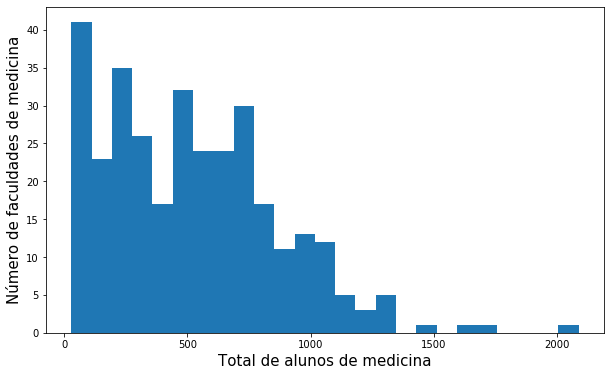

In [542]:
plt.figure(figsize=[10,6])
plt.hist(alunos_por_curso['TOTAL_ALUNOS'], bins=25)
plt.xlabel('Total de alunos de medicina', fontsize=15)
plt.ylabel('Número de faculdades de medicina', fontsize=15);

## New DataFrame - Group by course

In [581]:
medicina_df.columns.to_list()

['original_index',
 'NU_ANO_CENSO',
 'CO_IES',
 'TP_CATEGORIA_ADMINISTRATIVA',
 'TP_CAT_ADM_NAME',
 'TP_ORGANIZACAO_ACADEMICA',
 'TP_ORG_ACAD_NAME',
 'CO_CURSO',
 'CO_CURSO_POLO',
 'CO_CINE_ROTULO',
 'ID_ALUNO',
 'CO_ALUNO_CURSO',
 'CO_ALUNO_CURSO_ORIGEM',
 'TP_COR_RACA',
 'TP_RACA_NAME',
 'TP_SEXO',
 'TP_SEXO_NAME',
 'NU_ANO_NASCIMENTO',
 'NU_MES_NASCIMENTO',
 'NU_DIA_NASCIMENTO',
 'NU_IDADE',
 'TP_NACIONALIDADE',
 'TP_NAC_NAME',
 'CO_PAIS_ORIGEM',
 'CO_UF_NASCIMENTO',
 'CO_MUNICIPIO_NASCIMENTO',
 'IN_DEFICIENCIA',
 'IN_DEF_NAME',
 'TP_SITUACAO',
 'TP_SIT_NAME',
 'QT_CARGA_HORARIA_TOTAL',
 'QT_CARGA_HORARIA_INTEG',
 'DT_INGRESSO_CURSO',
 'IN_INGRESSO_VESTIBULAR',
 'IN_INGRESSO_ENEM',
 'IN_INGRESSO_AVALIACAO_SERIADA',
 'IN_INGRESSO_SELECAO_SIMPLIFICA',
 'IN_INGRESSO_OUTRO_TIPO_SELECAO',
 'IN_INGRESSO_VAGA_REMANESC',
 'IN_INGRESSO_VAGA_PROG_ESPECIAL',
 'IN_INGRESSO_TRANSF_EXOFFICIO',
 'IN_INGRESSO_DECISAO_JUDICIAL',
 'IN_INGRESSO_CONVENIO_PECG',
 'IN_INGRESSO_EGRESSO',
 'IN_INGRESSO_OUT

In [615]:
list_new_df = {
    
    'first':   ['NU_ANO_CENSO',
                'CO_IES',
                'TP_CAT_ADM_NAME',
                'TP_ORG_ACAD_NAME',
                'CO_CURSO_POLO',
                'CO_CINE_ROTULO',
                'QT_CARGA_HORARIA_TOTAL'],
        
    'count':   ['ID_ALUNO',
                'CO_ALUNO_CURSO',
                'CO_ALUNO_CURSO_ORIGEM'],
        
    'sum':     ['IN_INGRESSO_VESTIBULAR',
                'IN_INGRESSO_ENEM',
                'IN_INGRESSO_AVALIACAO_SERIADA',
                'IN_INGRESSO_SELECAO_SIMPLIFICA',
                'IN_INGRESSO_OUTRO_TIPO_SELECAO',
                'IN_INGRESSO_VAGA_REMANESC',
                'IN_INGRESSO_VAGA_PROG_ESPECIAL',
                'IN_INGRESSO_TRANSF_EXOFFICIO',
                'IN_INGRESSO_DECISAO_JUDICIAL',
                'IN_INGRESSO_CONVENIO_PECG',
                'IN_INGRESSO_EGRESSO',
                'IN_INGRESSO_OUTRA_FORMA',
                'IN_RESERVA_VAGAS',
                'IN_RESERVA_ETNICO',
                'IN_RESERVA_DEFICIENCIA',
                'IN_RESERVA_ENSINO_PUBLICO',
                'IN_RESERVA_RENDA_FAMILIAR',
                'IN_RESERVA_OUTRA',
                'IN_FINANCIAMENTO_ESTUDANTIL',
                'IN_FIN_REEMB_FIES',
                'IN_FIN_REEMB_ESTADUAL',
                'IN_FIN_REEMB_MUNICIPAL',
                'IN_FIN_REEMB_PROG_IES',
                'IN_FIN_REEMB_ENT_EXTERNA',
                'IN_FIN_REEMB_OUTRA',
                'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
                'IN_FIN_NAOREEMB_ESTADUAL',
                'IN_FIN_NAOREEMB_MUNICIPAL',
                'IN_FIN_NAOREEMB_PROG_IES',
                'IN_FIN_NAOREEMB_ENT_EXTERNA',
                'IN_FIN_NAOREEMB_OUTRA', 
                'IN_ATIVIDADE_EXTRACURRICULAR',
                'IN_COMPLEMENTAR_ESTAGIO',
                'IN_COMPLEMENTAR_EXTENSAO',
                'IN_COMPLEMENTAR_MONITORIA',
                'IN_COMPLEMENTAR_PESQUISA',
                'IN_BOLSA_ESTAGIO',
                'IN_BOLSA_EXTENSAO',
                'IN_BOLSA_MONITORIA',
                'IN_BOLSA_PESQUISA', 
                'IN_MOBILIDADE_ACADEMICA', 
                'IN_MATRICULA',
                'IN_CONCLUINTE',
                'IN_INGRESSO_TOTAL',
                'NU_ANO_INGRESSO']
                }

In [616]:
list1 = {i: oldi for oldi, oldx in list_new_df.items() for i in oldx}
print(list1)

{'NU_ANO_CENSO': 'first', 'CO_IES': 'first', 'TP_CAT_ADM_NAME': 'first', 'TP_ORG_ACAD_NAME': 'first', 'CO_CURSO_POLO': 'first', 'CO_CINE_ROTULO': 'first', 'QT_CARGA_HORARIA_TOTAL': 'first', 'ID_ALUNO': 'count', 'CO_ALUNO_CURSO': 'count', 'CO_ALUNO_CURSO_ORIGEM': 'count', 'IN_INGRESSO_VESTIBULAR': 'sum', 'IN_INGRESSO_ENEM': 'sum', 'IN_INGRESSO_AVALIACAO_SERIADA': 'sum', 'IN_INGRESSO_SELECAO_SIMPLIFICA': 'sum', 'IN_INGRESSO_OUTRO_TIPO_SELECAO': 'sum', 'IN_INGRESSO_VAGA_REMANESC': 'sum', 'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'sum', 'IN_INGRESSO_TRANSF_EXOFFICIO': 'sum', 'IN_INGRESSO_DECISAO_JUDICIAL': 'sum', 'IN_INGRESSO_CONVENIO_PECG': 'sum', 'IN_INGRESSO_EGRESSO': 'sum', 'IN_INGRESSO_OUTRA_FORMA': 'sum', 'IN_RESERVA_VAGAS': 'sum', 'IN_RESERVA_ETNICO': 'sum', 'IN_RESERVA_DEFICIENCIA': 'sum', 'IN_RESERVA_ENSINO_PUBLICO': 'sum', 'IN_RESERVA_RENDA_FAMILIAR': 'sum', 'IN_RESERVA_OUTRA': 'sum', 'IN_FINANCIAMENTO_ESTUDANTIL': 'sum', 'IN_FIN_REEMB_FIES': 'sum', 'IN_FIN_REEMB_ESTADUAL': 'sum', 'IN_FI

In [617]:
medicina_df2 = medicina_df.groupby('CO_CURSO', as_index=False).agg(list1)
medicina_df2

,CO_CURSO,NU_ANO_CENSO,CO_IES,TP_CAT_ADM_NAME,TP_ORG_ACAD_NAME,CO_CURSO_POLO,CO_CINE_ROTULO,QT_CARGA_HORARIA_TOTAL,ID_ALUNO,CO_ALUNO_CURSO,...,IN_COMPLEMENTAR_PESQUISA,IN_BOLSA_ESTAGIO,IN_BOLSA_EXTENSAO,IN_BOLSA_MONITORIA,IN_BOLSA_PESQUISA,IN_MOBILIDADE_ACADEMICA,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,NU_ANO_INGRESSO
0,12,2018,1,Pública Federal,Universidade,NaN,0912M01,8822,496,496,...,44.0,0.0,8.0,8.0,22.0,0.0,496,81,73,999543
1,140,2018,2,Pública Federal,Universidade,NaN,0912M01,7200,579,579,...,75.0,5.0,6.0,61.0,16.0,0.0,579,98,96,1166687
2,303,2018,3,Pública Federal,Universidade,NaN,0912M01,7545,637,637,...,135.0,1.0,8.0,4.0,40.0,0.0,637,91,100,1283637
3,389,2018,4,Pública Federal,Universidade,NaN,0912M01,8785,748,748,...,120.0,2.0,9.0,15.0,101.0,0.0,748,55,108,1507271
4,484,2018,5,Pública Federal,Universidade,NaN,0912M01,9285,509,509,...,88.0,25.0,0.0,68.0,88.0,0.0,509,72,75,1025701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,5001314,2018,2023,Privada com fins lucrativos,Centro Universitário,NaN,0912M01,7000,154,154,...,0.0,0.0,0.0,0.0,0.0,0.0,154,0,49,310563
318,5001341,2018,1227,Privada sem fins lucrativos,Faculdade,NaN,0912M01,8102,175,175,...,0.0,0.0,0.0,0.0,0.0,0.0,175,0,100,353075
319,5001406,2018,4,Pública Federal,Universidade,NaN,0912M01,8130,39,39,...,2.0,0.0,0.0,0.0,2.0,0.0,39,0,14,78677
320,5001427,2018,585,Pública Federal,Universidade,NaN,0912M01,7200,61,61,...,0.0,0.0,0.0,0.0,0.0,0.0,61,0,61,123098


In [488]:
medicina_df[medicina_df['CO_CURSO'] == 5001314]['IN_FINANCIAMENTO_ESTUDANTIL'].count()

154

In [ ]:
medicina_df2 = pd.DataFrame(medicina_df2).reset_index()
medicina_df2 = medicina_df2.rename(columns={'ID_ALUNO': 'TOTAL_ALUNOS'})
medicina_df2

In [547]:
list_replace_dif_1 = ['IN_RESERVA_ETNICO',
                      'IN_RESERVA_DEFICIENCIA',
                      'IN_RESERVA_ENSINO_PUBLICO',
                      'IN_RESERVA_RENDA_FAMILIAR',
                      'IN_RESERVA_OUTRA',
                      'IN_FINANCIAMENTO_ESTUDANTIL',
                      'IN_FIN_REEMB_FIES',
                      'IN_FIN_REEMB_ESTADUAL',
                      'IN_FIN_REEMB_MUNICIPAL',
                      'IN_FIN_REEMB_PROG_IES',
                      'IN_FIN_REEMB_ENT_EXTERNA',
                      'IN_FIN_REEMB_OUTRA',
                      'IN_FIN_NAOREEMB_PROUNI_INTEGR',
                      'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
                      'IN_FIN_NAOREEMB_ESTADUAL',
                      'IN_FIN_NAOREEMB_MUNICIPAL',
                      'IN_FIN_NAOREEMB_PROG_IES',
                      'IN_FIN_NAOREEMB_ENT_EXTERNA',
                      'IN_FIN_NAOREEMB_OUTRA','IN_ATIVIDADE_EXTRACURRICULAR',
                      'IN_COMPLEMENTAR_ESTAGIO',
                      'IN_COMPLEMENTAR_EXTENSAO',
                      'IN_COMPLEMENTAR_MONITORIA',
                      'IN_COMPLEMENTAR_PESQUISA',
                      'IN_BOLSA_ESTAGIO',
                      'IN_BOLSA_EXTENSAO',
                      'IN_BOLSA_MONITORIA',
                      'IN_BOLSA_PESQUISA', 
                      'IN_MOBILIDADE_ACADEMICA']